In [21]:
# Importaremos nuestras librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings("ignore")

In [22]:
# Daremos un estilo a nuestro Notebook
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [23]:
df = pd.read_csv("/kaggle/input/transaction-dashboard/Transaction dataset.csv")
df.head()

Date     Region CustomerID  TransactionAmount TransactionType
0  2024-01-15   Tashkent       C001             500000          Online
1  2024-02-10  Samarkand       C002            1200000             ATM
2  2024-05-20   Tashkent       C003             300000          Online
3  2025-01-16   Tashkent       C001             600000          Online
4  2025-02-12  Samarkand       C002            1100000             ATM

In [24]:
# Estrucutrua y formato del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               7 non-null      object
 1   Region             7 non-null      object
 2   CustomerID         7 non-null      object
 3   TransactionAmount  7 non-null      int64 
 4   TransactionType    7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes


In [25]:
# Verificar valores Nulos:
df.isnull().sum()

Date                 0
Region               0
CustomerID           0
TransactionAmount    0
TransactionType      0
dtype: int64

In [26]:
# Le daremos formato a la columna Date a formato DateTime:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

# Analisis exploratorio de datos (DAE):

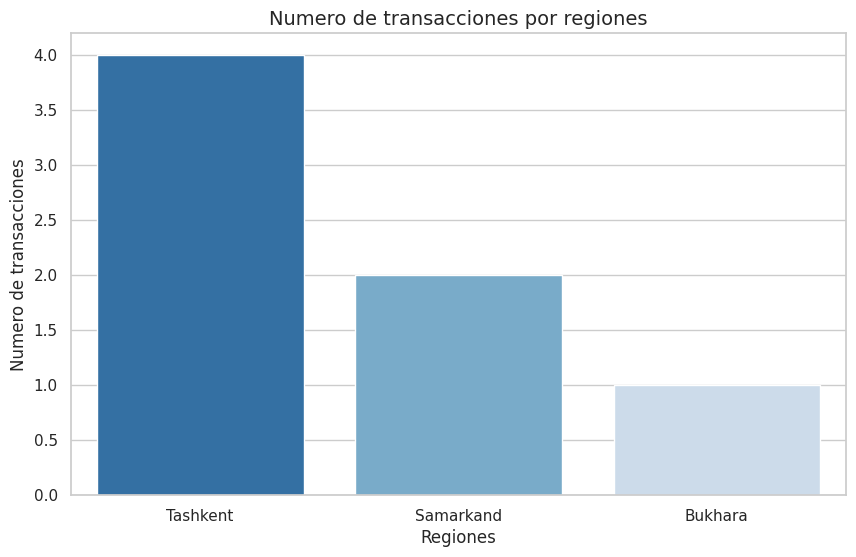

In [27]:
# Grafico de barra que muestra los medios de pagos mas usados:
region_counts = df["Region"].value_counts()
sns.barplot(
    x=region_counts.index,
    y=region_counts.values,
    palette="Blues_r")

plt.title("Numero de transacciones por regiones", fontsize=14)
plt.xlabel("Regiones")
plt.ylabel("Numero de transacciones")
plt.show()

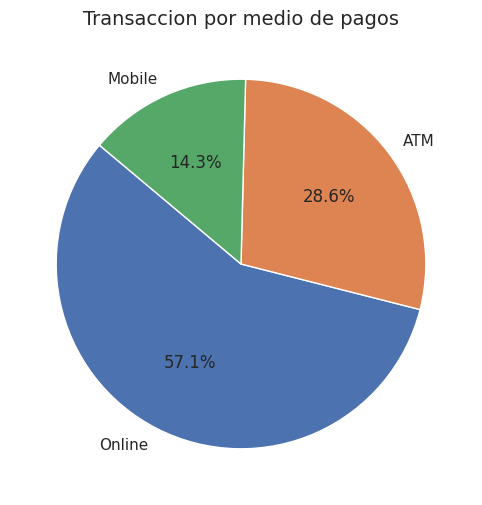

In [28]:
# Grafico circular que muestra la proporcion de compras por medios de pago:
type_counts = df["TransactionType"].value_counts()

plt.pie(
    type_counts.values,
    labels = type_counts.index,
    autopct = "%1.1f%%",
    startangle = 140)

plt.title("Transaccion por medio de pagos", fontsize=14)
plt.show()

Podemos apreciar en ambos grficos el numero de transacciones esta equilibrada tanto por region como por metodo de pago.

### Distribucion de variables y dispersion asimetrica de datos:
Usaremos un histograma para conocer como es la distrbucion de las varibales en los datos y boxplot para ver la distribucion y revisar si hay datos fuera del rango

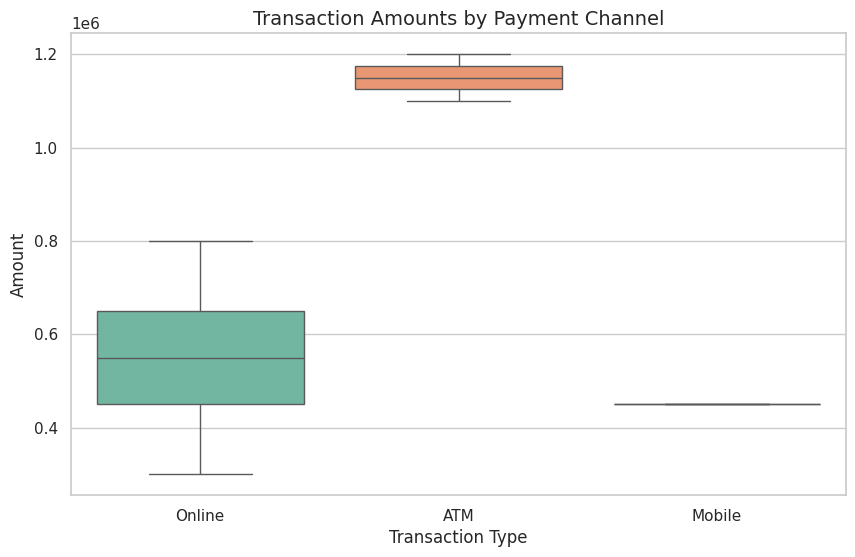

In [33]:
sns.boxplot(
    data = df,
    x="TransactionType",
    y="TransactionAmount",
    palette="Set2"
)

plt.title("Transaction Amounts by Payment Channel", fontsize=14)
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.show()

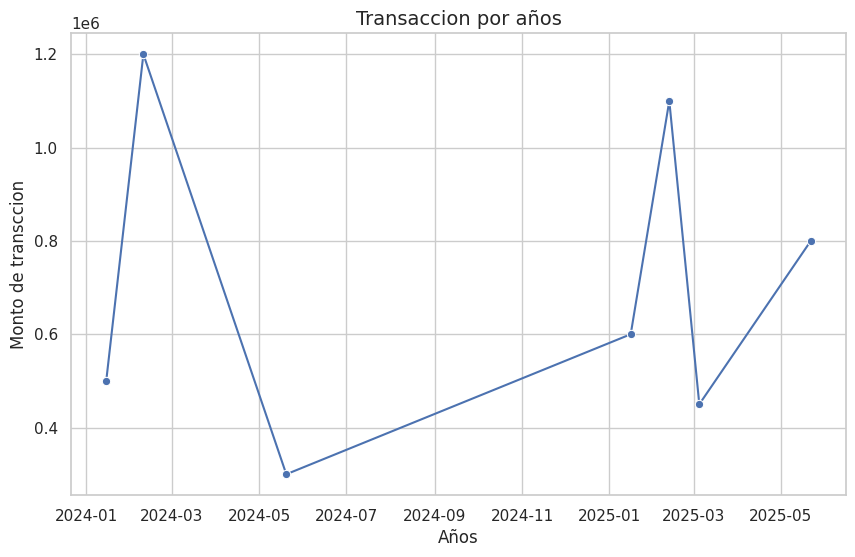

In [37]:
# Crearemos un grafico de tendencia en el cual nos mostrara las transacciones por año
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Year"] = df["Date"].dt.year

sns.lineplot(
    data = df,
    x="Date",
    y="TransactionAmount",
    marker = "o"
)

plt.title("Transaccion por años", fontsize=14)
plt.xlabel("Años")
plt.ylabel("Monto de transccion")
plt.show()

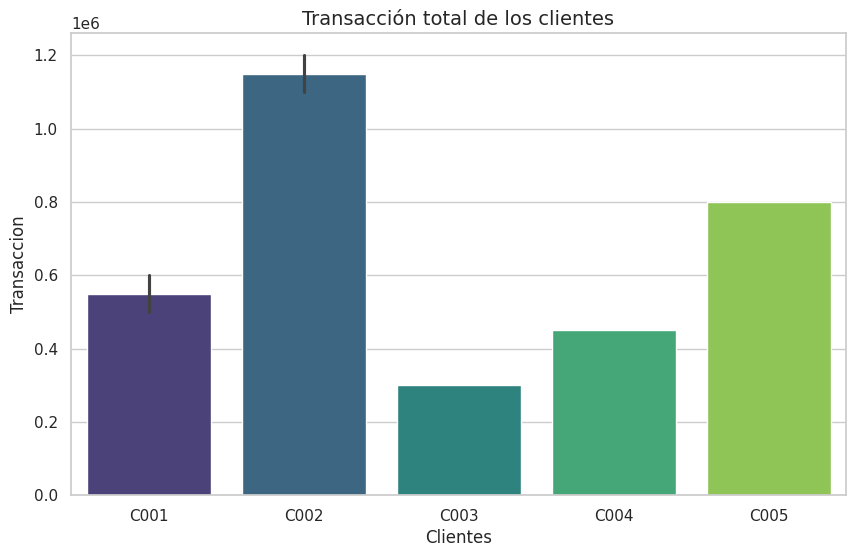

In [38]:
# Total transaccion por cliente:
sns.barplot(
    data = df,
    x = "CustomerID",
    y = "TransactionAmount",
    palette = "viridis"

)

plt.title("Transacción total de los clientes", fontsize=14)
plt.xlabel("Clientes")
plt.ylabel("Transaccion")
plt.show()

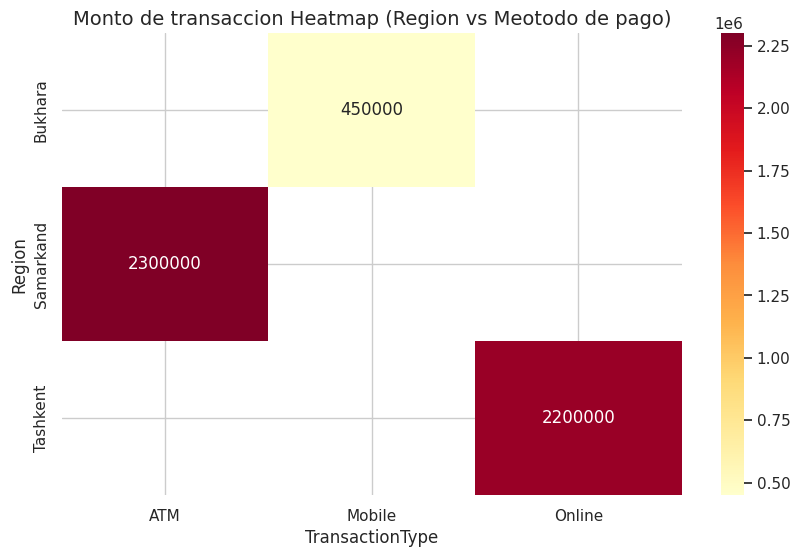

In [39]:

pivot = pd.pivot_table(
    df,
    values="TransactionAmount",
    index="Region",
    columns="TransactionType",
    aggfunc="sum"
)

sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)

plt.title("Monto de transaccion Heatmap (Region vs Meotodo de pago)", fontsize=14)
plt.show()

In [41]:
# Crearemos 2 nuevas columnas que nos indicaran cual nos permitira que categoria de pago
# es mas usada ya sea la digital o tradicional
df["HighValueTransaction"] = df["TransactionAmount"] > df["TransactionAmount"].median()
df["DigitalTransaction"] = df["TransactionType"].isin(["Online", "Mobile"])

df

Date     Region CustomerID  TransactionAmount TransactionType  Year  \
0 2024-01-15   Tashkent       C001             500000          Online  2024   
1 2024-02-10  Samarkand       C002            1200000             ATM  2024   
2 2024-05-20   Tashkent       C003             300000          Online  2024   
3 2025-01-16   Tashkent       C001             600000          Online  2025   
4 2025-02-12  Samarkand       C002            1100000             ATM  2025   
5 2025-03-05    Bukhara       C004             450000          Mobile  2025   
6 2025-05-22   Tashkent       C005             800000          Online  2025   

   HighValueTransaction  DigitalTransaction  
0                 False                True  
1                  True               False  
2                 False                True  
3                 False                True  
4                  True               False  
5                 False                True  
6                  True                True

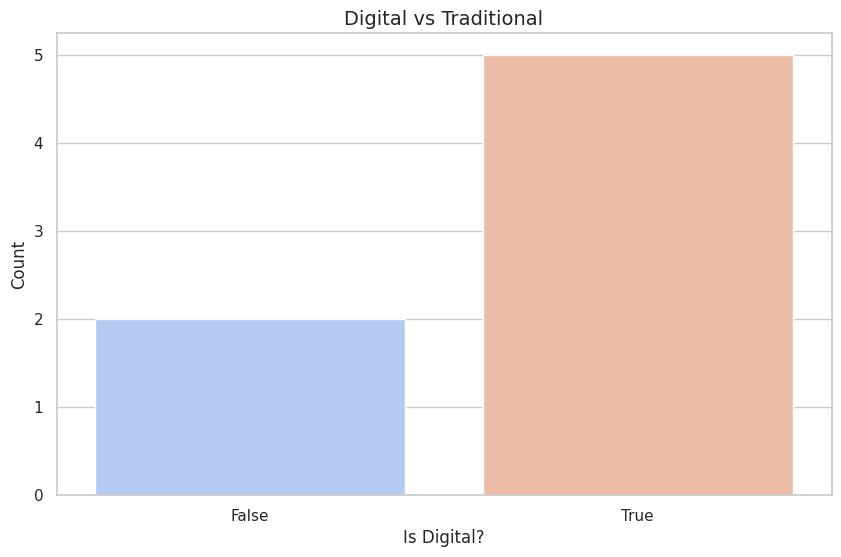

In [42]:
sns.countplot(
    data=df,
    x="DigitalTransaction",
    palette="coolwarm"
)

plt.title("Digital vs Traditional", fontsize=14)
plt.xlabel("Is Digital?")
plt.ylabel("Count")
plt.show()